> ERC Starting Grant on COeXISTENCE between humans and machines in urban mobility.


# Title: Comparative analysis of human and machine agents on a two route map
## Name: Anastasia
### Date: September 9, 2024
---

### Description

> This notebook presents a comparison of three distinct experiments. In each experiment, we start with 10 human agents who learn to navigate the optimal route within the system. After some time, 50% of these human agents are replaced by machine agents. The machine agents also learn to find the optimal route, each using one of three different reinforcement learning (RL) algorithms, with each experiment utilizing a unique RL method for training the machine agents.
---

## Objective

> The objective of this notebook is to demonstrate, explain, and visualize the outcomes of these experiments in order to determine which reinforcement learning algorithm, DQN, PPO, SAC, is more efficient and converges faster in this specific scenario.
---

## Experiment Summary

### Network Architecture
- Two route network
---

### Episodes
- 200 human learning - 400 machine learning
---


### Agents
| **Type**          |           |
|-------------------|---------------------|
| **Number**        | 20 humans(before mutation) -> 10 humans, 10 machines (after mutation) |
| **Total demand** | random |
---


### Origin and Destination Details
| **Origin Count**      | 1                          |
|-----------------------|----------------------------|
| **Destination Count** | 1                          |

All the agents have the same origin and destination points.

---


### Execution time
| **Experiments**      | **Time**                      |
|-----------------------|------------------------------|
|  DQN algorithm        |        00:39:15 (gpu)        |
|  PPO algorithm        |        02:06:09 (gpu)        |
|  SAC algorithm        |        03:34:15 (cpu)        |
---

    

### Hardware Utilized for Experiment Execution
The experiments run on the server.
| **Type of Machine** | Server |
|----------------------|-------------------------------|
| **Parition**         | dgx                           |
| **Memory**           | 64GB                          |
| **GPU**              | 1                             |
| **Operating System** | Linux                         |
| **QoS(how long the job runs)**| big                    |
---

> The video start with episode 20, beta=100.

<video width="640" height="480" controls>
  <source src="img/sumo_video_beta100_ep20.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

### Comments on the functionality of PPO and SAC algorithms

- PPO (Proximal Policy Optimization) is an on-policy algorithm, meaning its replay buffer is sized according to the number of frames collected per episode and is fully updated each episode. In contrast, SAC (Soft Actor-Critic) is an off-policy algorithm with a larger replay buffer, in this experiment set to 10 times the size of each policy update. Consequently, SAC's replay buffer includes trajectories from previous episodes.

- Both PPO and SAC are applicable to both discrete and continuous action spaces.


## Only humans

> Convergence of the cost table values of human(ID=5).

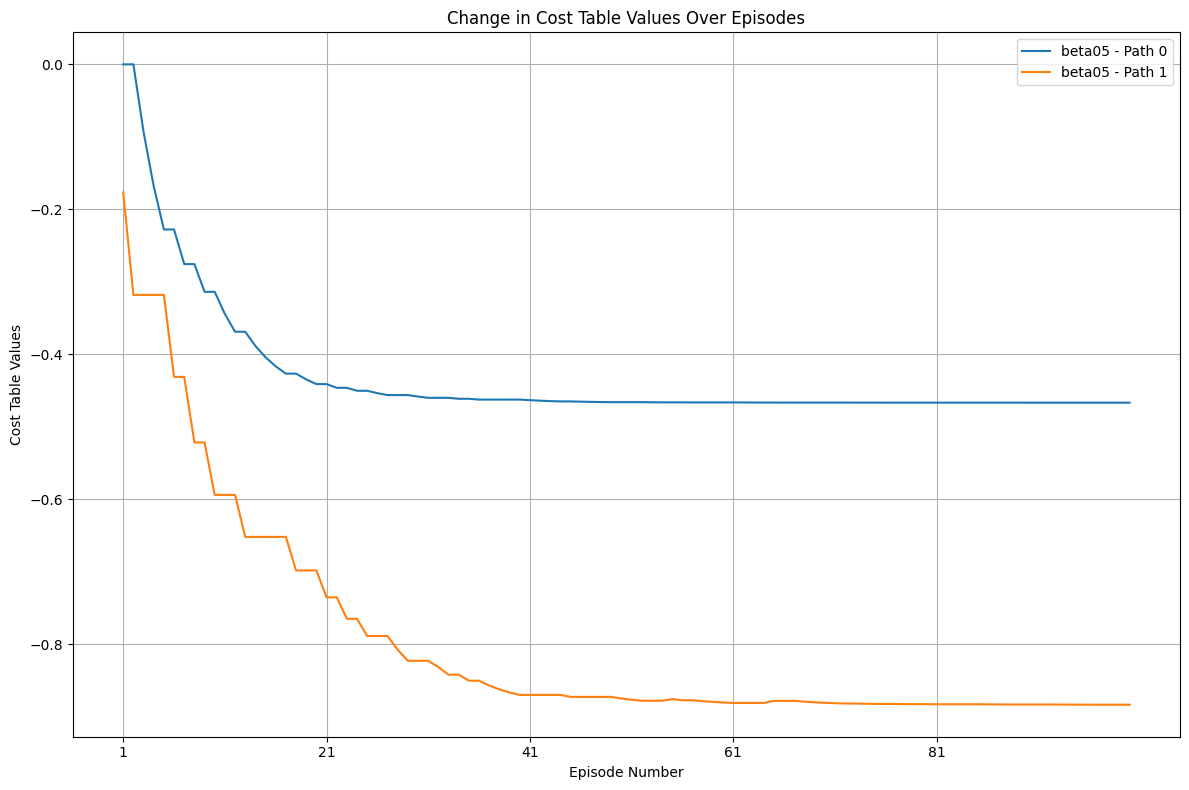

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the paths to the folders containing CSV files
folders = [
    'training_records/only_humans_beta05_rand0/episodes', 
]

# Initialize a dictionary to store data for plotting
data = {folder: {'indices': [], 'values_1': [], 'values_2': []} for folder in folders}

# Process each folder
for folder_path in folders:
    # Get all CSV files in the folder
    file_names = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.csv')],
        key=lambda x: int(x.split('.')[0].replace('ep', ''))
    )
    # Traverse the sorted list of files
    for file_name in file_names:
        episode_number = int(file_name.split('.')[0].replace('ep', ''))
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter rows where 'id' is 5
        filtered_df = df[df['id'] == 5]
        
        # Extract and store the cost_table values
        if not filtered_df.empty:
            data[folder_path]['indices'].append(episode_number)
            cost_tables = filtered_df['cost_table'].values[0]  # Get the cost_table value as a string
            cost_values = list(map(float, cost_tables.split(',')))  # Convert the string to float values
            
            data[folder_path]['values_1'].append(cost_values[0])
            data[folder_path]['values_2'].append(cost_values[1])

# Plot the data
plt.figure(figsize=(12, 8))

# Plot data for each folder
for folder_path, values in data.items():
    parts = folder_path.split('only_humans_')
    if len(parts) > 1:
        sub_parts = parts[1].split('_rand0/episodes')
        if len(sub_parts) > 0:
            legend = sub_parts[0]
                        
    plt.plot(values['indices'], values['values_1'], label=f'{legend} - Path 0')
    plt.plot(values['indices'], values['values_2'], label=f'{legend} - Path 1')

# Add labels and title
plt.xlabel('Episode Number')
plt.ylabel('Cost Table Values')
plt.title('Change in Cost Table Values Over Episodes')

# Set x-axis ticks to show every 20th value
all_indices = [index for sublist in [values['indices'] for values in data.values()] for index in sublist]
plt.xticks(ticks=[all_indices[i] for i in range(0, len(all_indices), 20)])

# Add a grid for better readability
plt.grid(True)

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


> Cost tables for system with varying beta values for human agent (ID = 5).

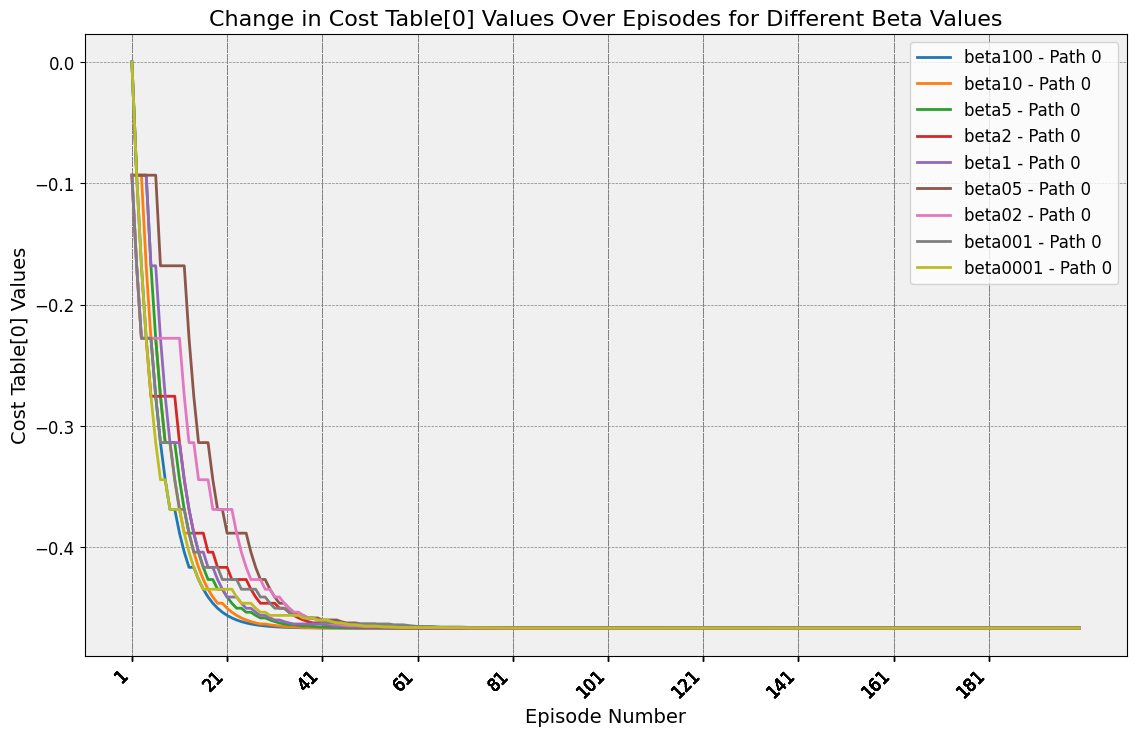

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the paths to the folders containing CSV files
folders = [
    'training_records/only_humans_beta100_rand0/episodes',
    'training_records/only_humans_beta10_rand0/episodes',
    'training_records/only_humans_beta5_rand0/episodes',
    'training_records/only_humans_beta2_rand0/episodes',
    'training_records/only_humans_beta1_rand0/episodes',
    'training_records/only_humans_beta05_rand0/episodes',
    'training_records/only_humans_beta02_rand0/episodes',
    'training_records/only_humans_beta001_rand0/episodes',
    'training_records/only_humans_beta0001_rand0/episodes'     
]

# Initialize a dictionary to store data for plotting
data = {folder: {'indices': [], 'values_1': []} for folder in folders}

# Process each folder
for folder_path in folders:
    # Get all CSV files in the folder
    file_names = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.csv')],
        key=lambda x: int(x.split('.')[0].replace('ep', ''))
    )
    # Traverse the sorted list of files
    for file_name in file_names:
        episode_number = int(file_name.split('.')[0].replace('ep', ''))
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter rows where 'id' is 5
        filtered_df = df[df['id'] == 5]
        
        # Extract and store the cost_table[0] value
        if not filtered_df.empty:
            data[folder_path]['indices'].append(episode_number)
            cost_tables = filtered_df['cost_table'].values[0]  # Get the cost_table value as a string
            cost_values = list(map(float, cost_tables.split(',')))  # Convert the string to float values
            
            # Only store cost_table[0] values
            data[folder_path]['values_1'].append(cost_values[0])

# Plot the data
plt.figure(figsize=(12, 8))

# Set background color
plt.gca().set_facecolor('#f0f0f0')  # Light grey background
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Plot data for each folder
for folder_path, values in data.items():
    parts = folder_path.split('only_humans_')
    if len(parts) > 1:
        sub_parts = parts[1].split('_rand0/episodes')
        if len(sub_parts) > 0:
            legend = sub_parts[0]
                        
    plt.plot(values['indices'], values['values_1'], label=f'{legend} - Path 0', linewidth=2)

# Add labels and title with improved font size
plt.xlabel('Episode Number', fontsize=14)
plt.ylabel('Cost Table[0] Values', fontsize=14)
plt.title('Change in Cost Table[0] Values Over Episodes for Different Beta Values', fontsize=16)

# Customize x-axis ticks
all_indices = [index for sublist in [values['indices'] for values in data.values()] for index in sublist]
xticks_positions = [all_indices[i] for i in range(0, len(all_indices), 20)]  # Every 20th value

plt.xticks(
    ticks=xticks_positions, 
    labels=[f'{x}' for x in xticks_positions],  # Ensure they're shown as integers
    fontsize=12, 
    rotation=45,  # Rotate the labels slightly for better readability
    ha='right'  # Align the text to the right for better spacing
)

# Customize y-axis tick parameters
plt.yticks(fontsize=12)

# Add a subtle grid
plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)

# Set tighter margins and add padding
plt.tight_layout(pad=3)

# Add a legend with a better font size and style
plt.legend(loc='best', fontsize=12)

# Show the plot
plt.show()


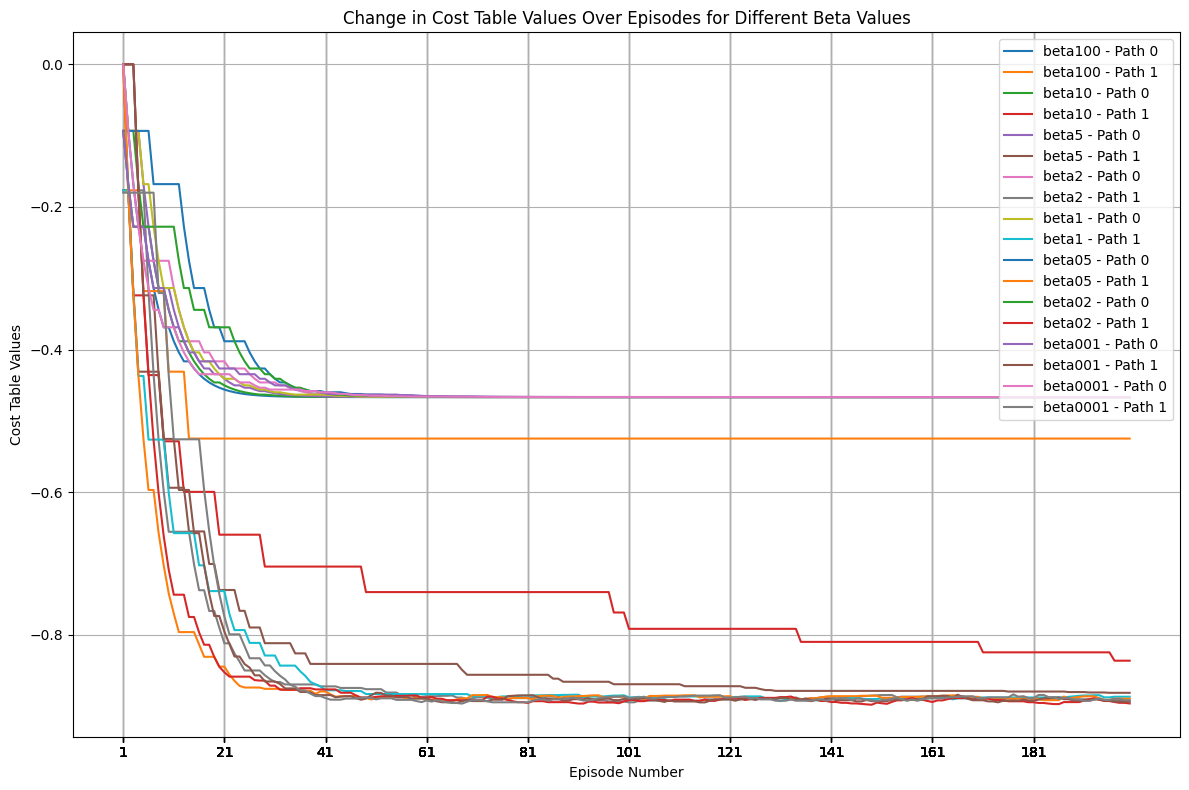

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the paths to the folders containing CSV files
folders = [
    'training_records/only_humans_beta100_rand0/episodes',
    'training_records/only_humans_beta10_rand0/episodes',
    'training_records/only_humans_beta5_rand0/episodes',
    'training_records/only_humans_beta2_rand0/episodes',
    'training_records/only_humans_beta1_rand0/episodes',
    'training_records/only_humans_beta05_rand0/episodes',
    'training_records/only_humans_beta02_rand0/episodes',
    'training_records/only_humans_beta001_rand0/episodes',
    'training_records/only_humans_beta0001_rand0/episodes'     
]

# Initialize a dictionary to store data for plotting
data = {folder: {'indices': [], 'values_1': [], 'values_2': []} for folder in folders}

# Process each folder
for folder_path in folders:
    # Get all CSV files in the folder
    file_names = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.csv')],
        key=lambda x: int(x.split('.')[0].replace('ep', ''))
    )
    # Traverse the sorted list of files
    for file_name in file_names:
        episode_number = int(file_name.split('.')[0].replace('ep', ''))
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter rows where 'id' is 5
        filtered_df = df[df['id'] == 5]
        
        # Extract and store the cost_table values
        if not filtered_df.empty:
            data[folder_path]['indices'].append(episode_number)
            cost_tables = filtered_df['cost_table'].values[0]  # Get the cost_table value as a string
            cost_values = list(map(float, cost_tables.split(',')))  # Convert the string to float values
            
            data[folder_path]['values_1'].append(cost_values[0])
            data[folder_path]['values_2'].append(cost_values[1])

# Plot the data
plt.figure(figsize=(12, 8))

# Plot data for each folder
for folder_path, values in data.items():
    parts = folder_path.split('only_humans_')
    if len(parts) > 1:
        sub_parts = parts[1].split('_rand0/episodes')
        if len(sub_parts) > 0:
            legend = sub_parts[0]
                        
    plt.plot(values['indices'], values['values_1'], label=f'{legend} - Path 0')
    plt.plot(values['indices'], values['values_2'], label=f'{legend} - Path 1')

# Add labels and title
plt.xlabel('Episode Number')
plt.ylabel('Cost Table Values')
plt.title('Change in Cost Table Values Over Episodes for Different Beta Values')

# Set x-axis ticks to show every 20th value
all_indices = [index for sublist in [values['indices'] for values in data.values()] for index in sublist]
plt.xticks(ticks=[all_indices[i] for i in range(0, len(all_indices), 20)])

# Add a grid for better readability
plt.grid(True)

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

> Reward for system with varying beta values for human agent (ID=5).

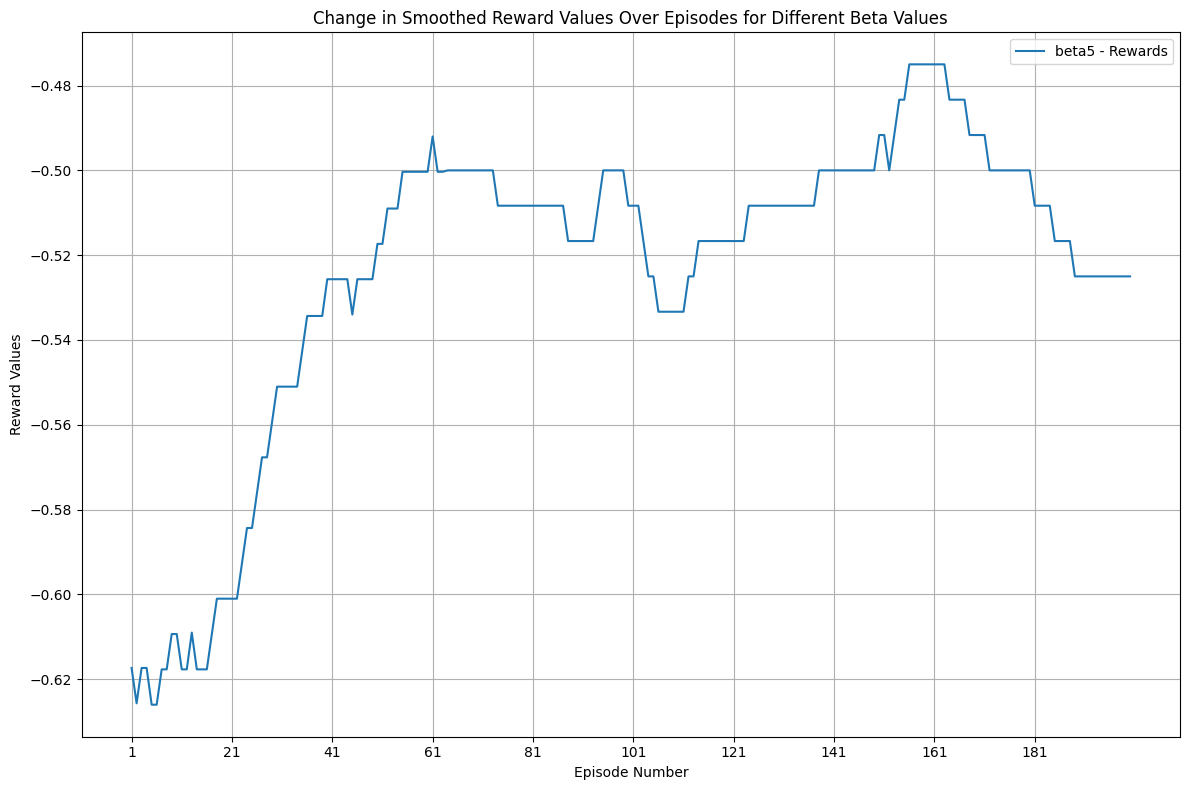

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter1d  # Import the uniform_filter1d function

# Define the paths to the folders containing CSV files
folders = [
    'training_records/only_humans_beta5_rand0/episodes',

]

# Initialize a dictionary to store data for plotting
data = {folder: {'indices': [], 'rewards': []} for folder in folders}

# Process each folder
for folder_path in folders:
    # Get all CSV files in the folder
    file_names = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.csv')],
        key=lambda x: int(x.split('.')[0].replace('ep', ''))
    )
    # Traverse the sorted list of files
    for file_name in file_names:
        episode_number = int(file_name.split('.')[0].replace('ep', ''))
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter rows where 'id' is 5
        filtered_df = df[df['id'] == 5]
        
        # Extract and store the reward values
        if not filtered_df.empty:
            data[folder_path]['indices'].append(episode_number)
            reward_value = filtered_df['reward'].values[0]  # Get the reward value
            data[folder_path]['rewards'].append(reward_value)

# Define the smoothing window size (adjust as needed)
window_size = 50  # Smoothing over 5 episodes

# Plot the data
plt.figure(figsize=(12, 8))

# Plot data for each folder
for folder_path, values in data.items():
    parts = folder_path.split('only_humans_')
    if len(parts) > 1:
        sub_parts = parts[1].split('_rand0/episodes')
        if len(sub_parts) > 0:
            legend = sub_parts[0]
    
    # Smooth the rewards using uniform_filter1d
    smoothed_rewards = uniform_filter1d(values['rewards'], size=window_size)
    
    # Plot the smoothed rewards
    plt.plot(values['indices'], smoothed_rewards, label=f'{legend} - Rewards')

# Add labels and title
plt.xlabel('Episode Number')
plt.ylabel('Reward Values')
plt.title('Change in Smoothed Reward Values Over Episodes for Different Beta Values')

# Set x-axis ticks to show every 20th value
all_indices = [index for sublist in [values['indices'] for values in data.values()] for index in sublist]
plt.xticks(ticks=[all_indices[i] for i in range(0, len(all_indices), 20)])

# Add a grid for better readability
plt.grid(True)

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

> Actions over episodes for human(ID=5)

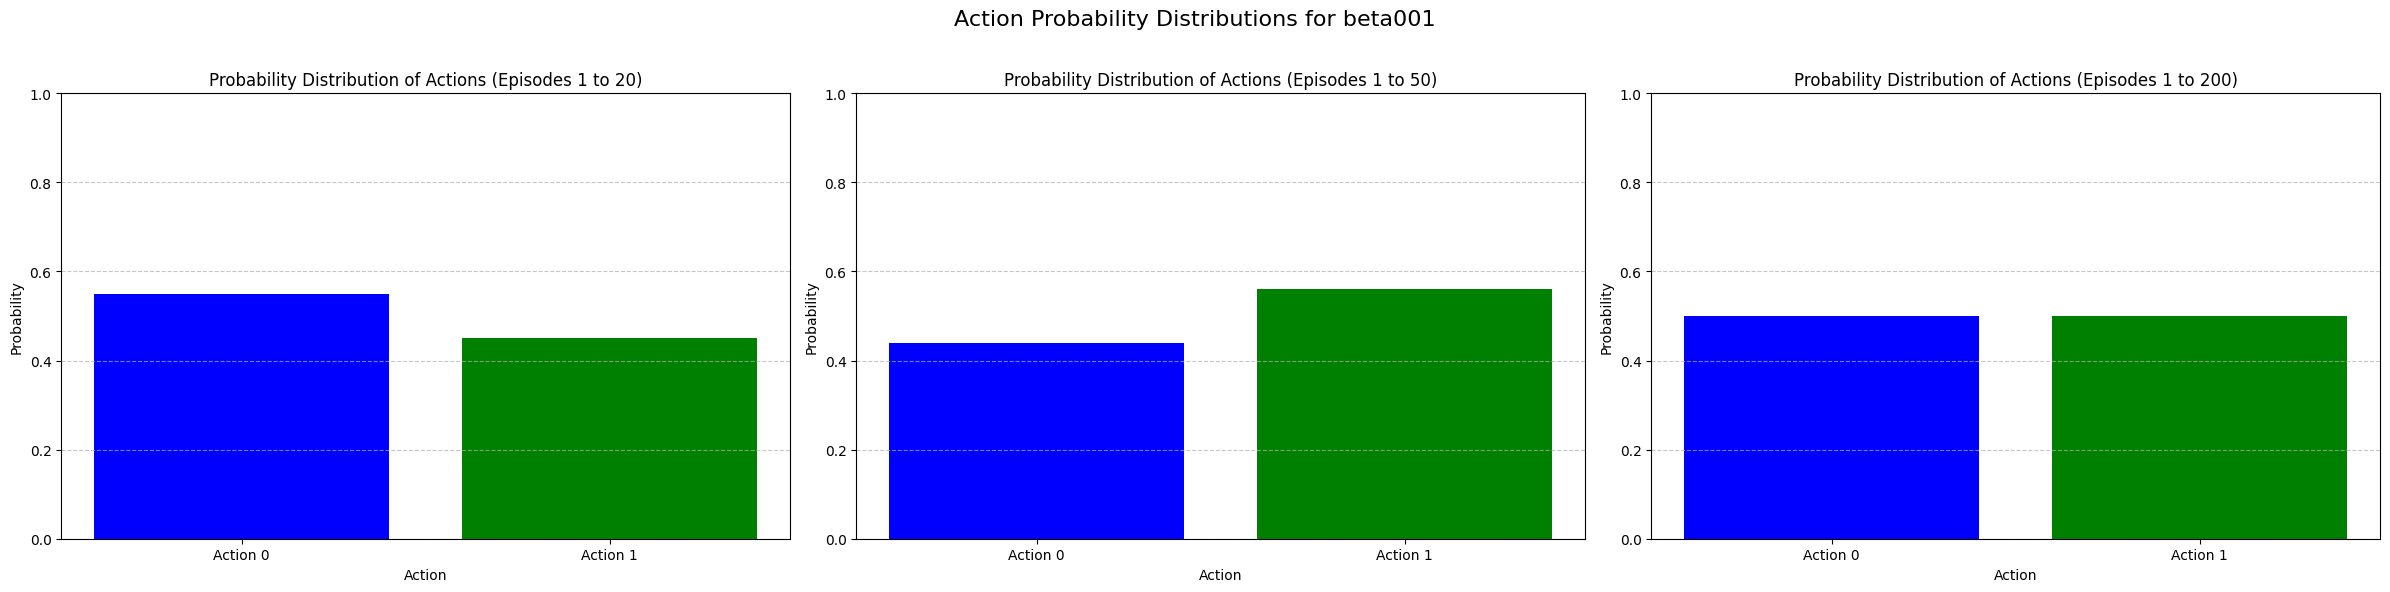

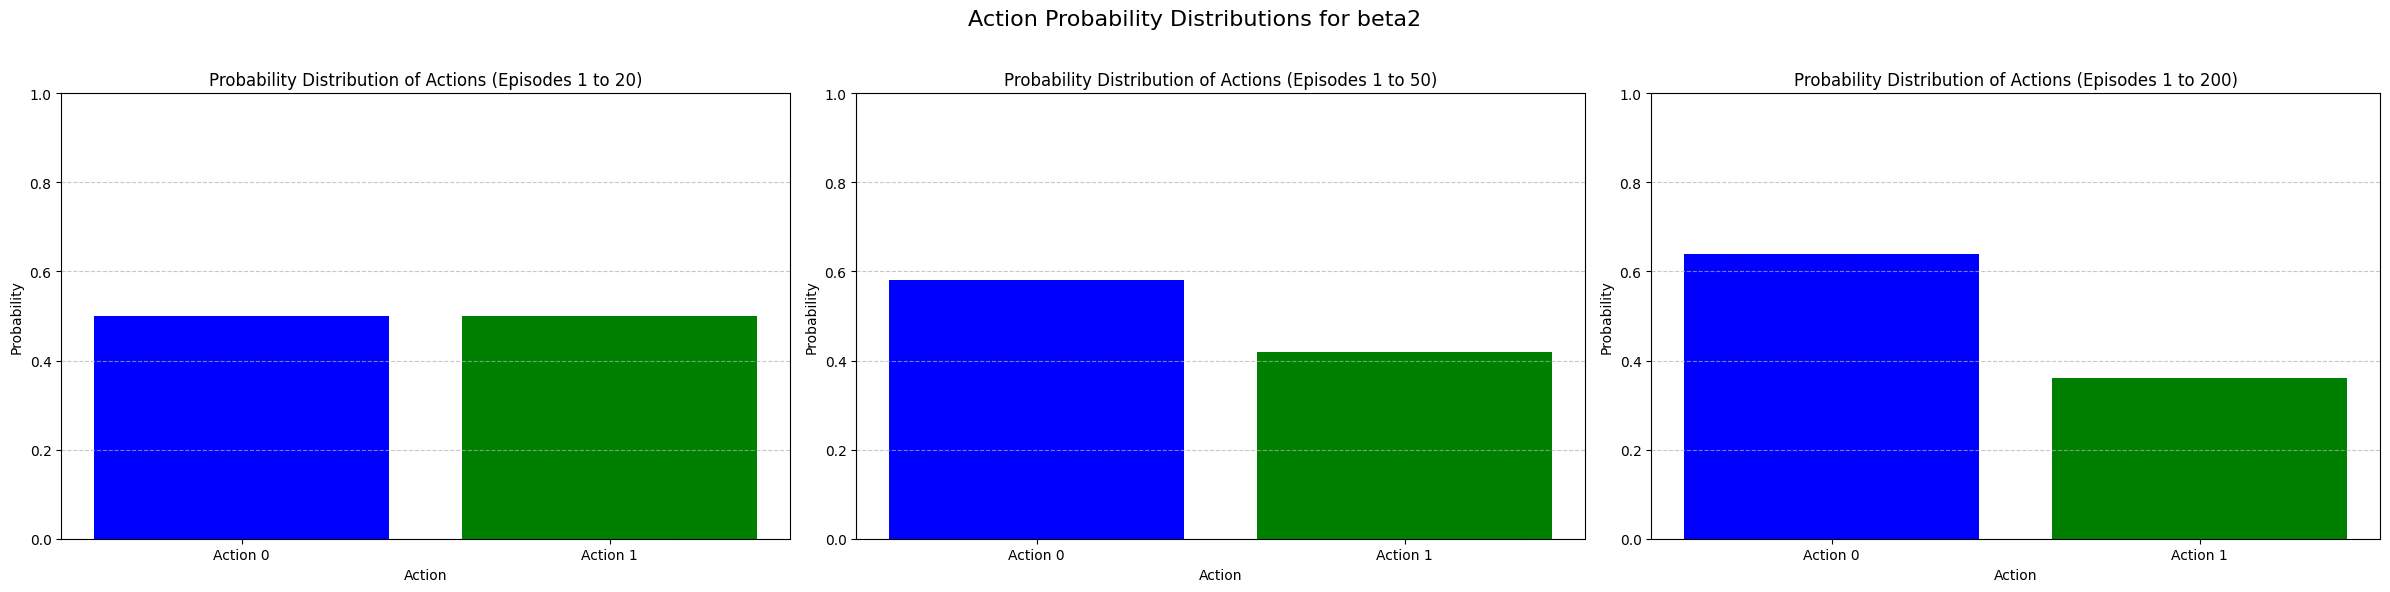

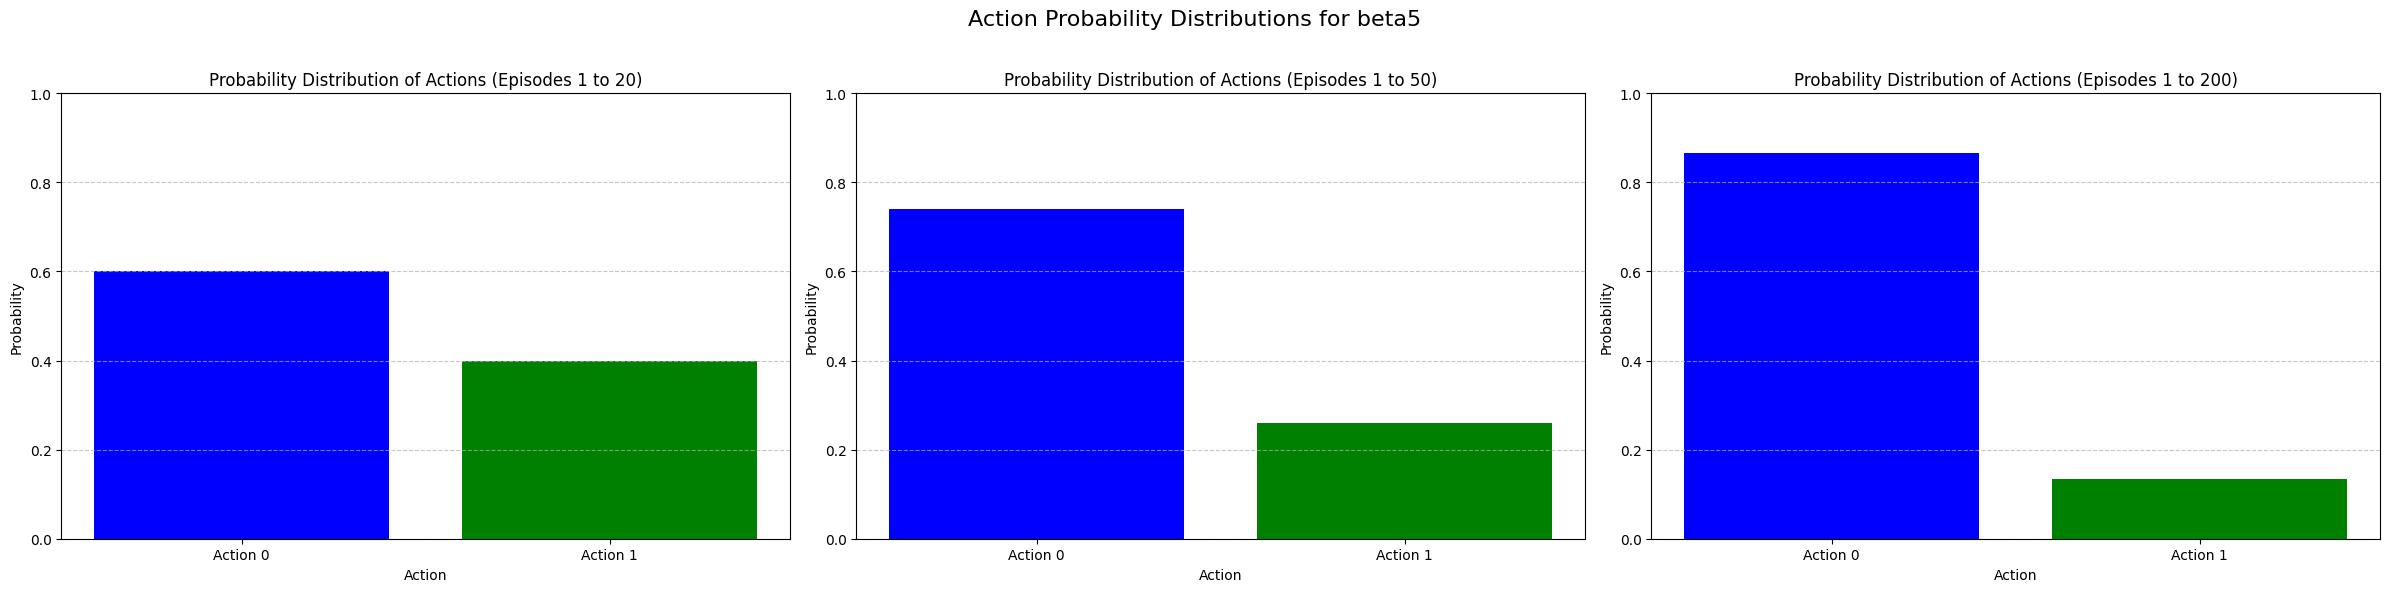

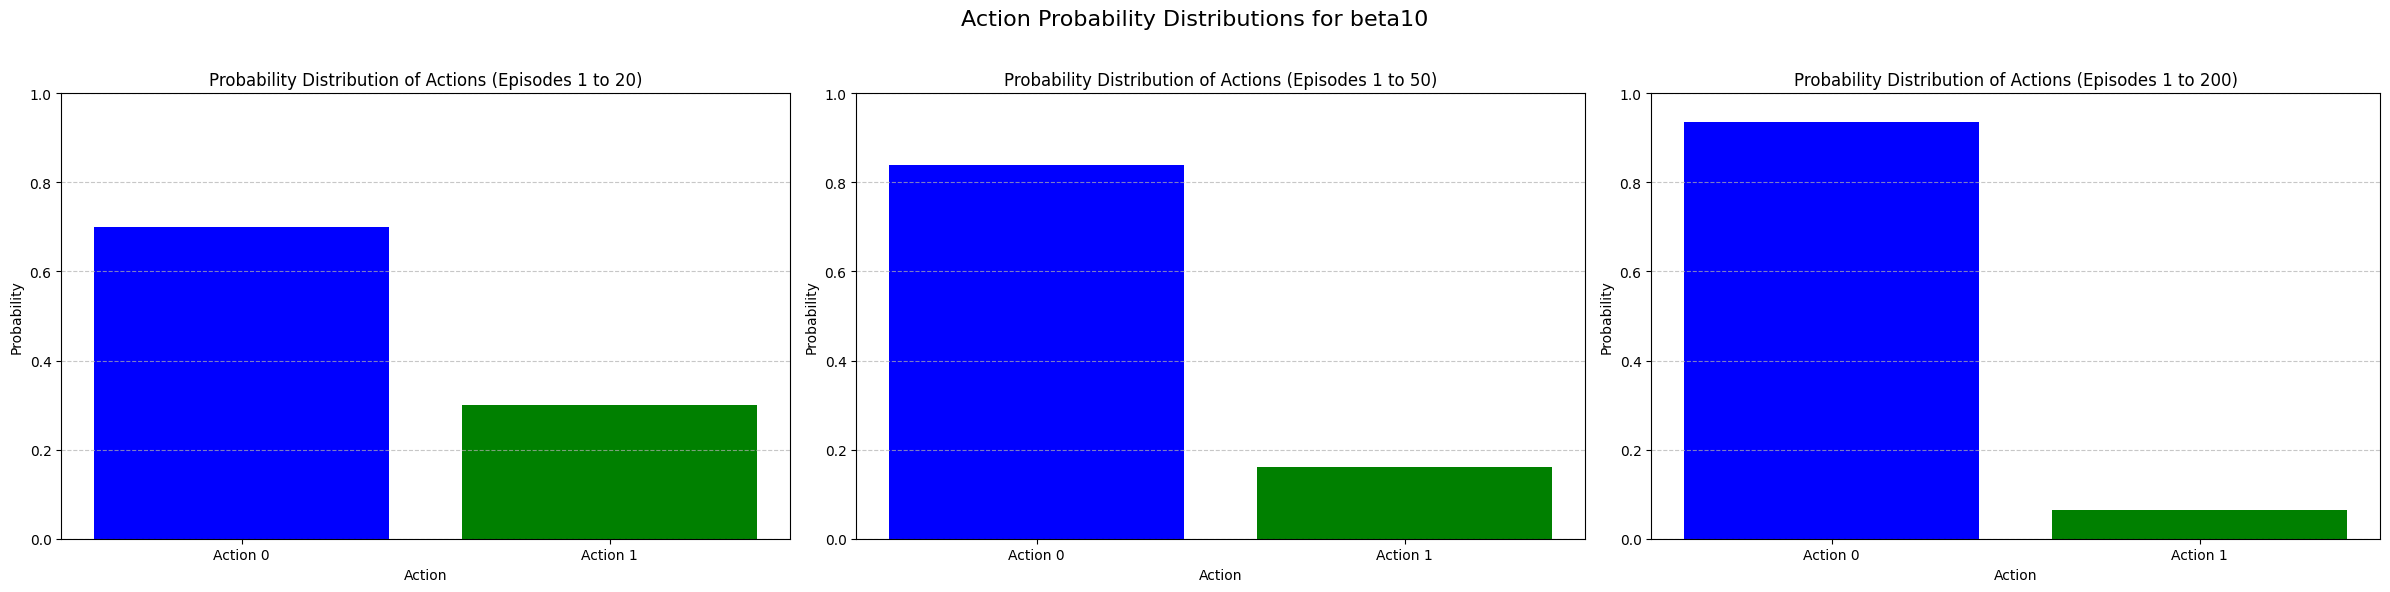

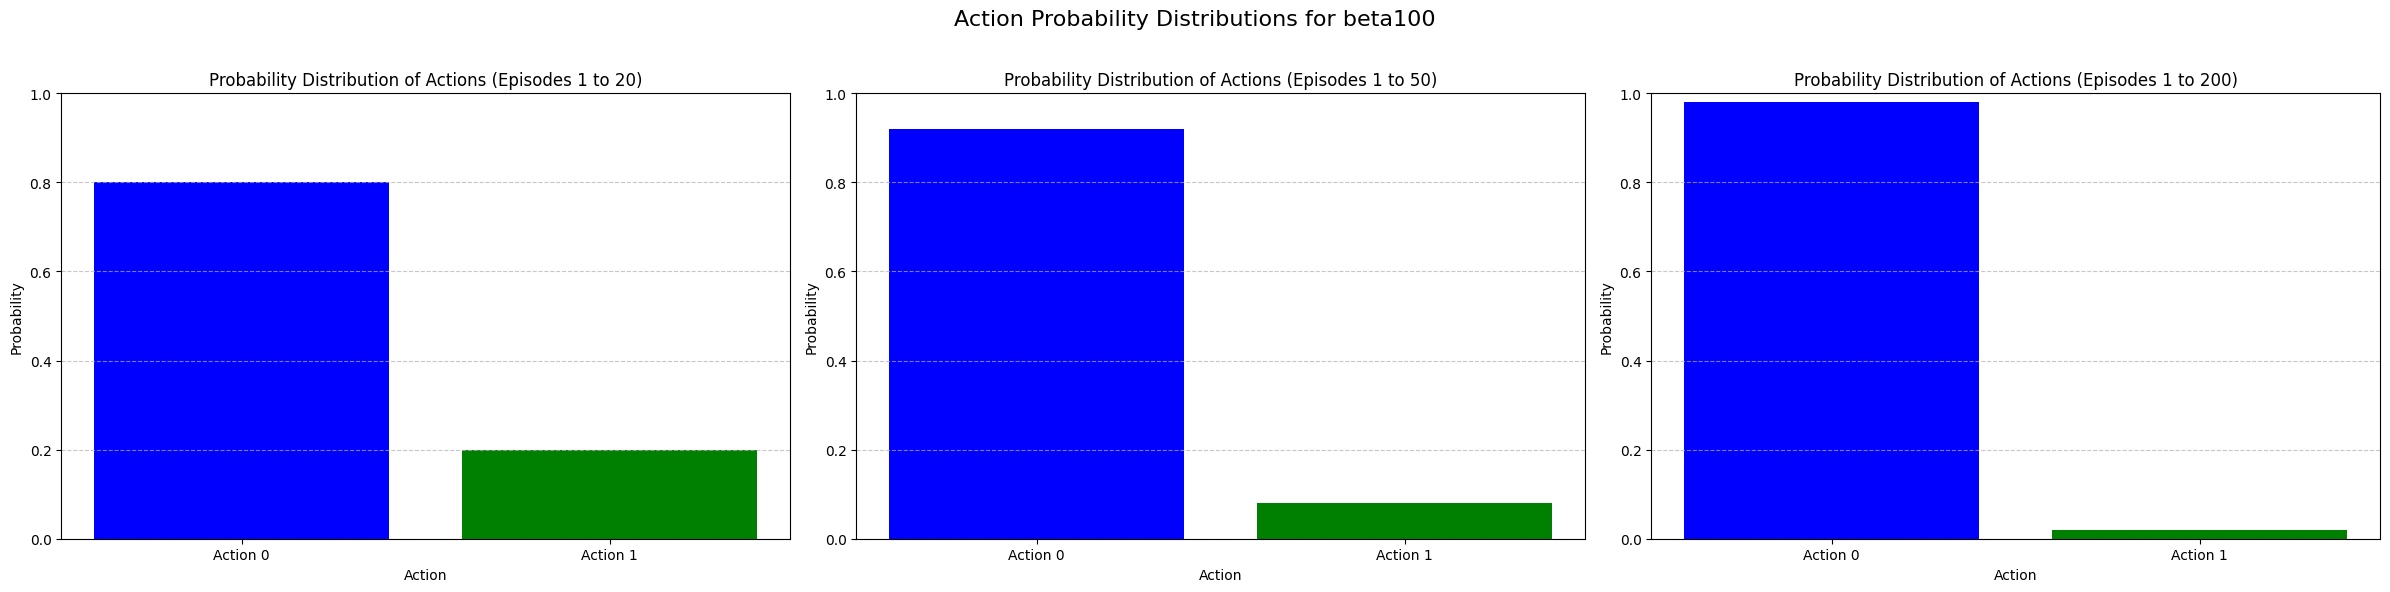

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of folder paths containing CSV files
folders = [
    'training_records/only_humans_beta001_rand0/episodes',
    'training_records/only_humans_beta2_rand0/episodes',
    'training_records/only_humans_beta5_rand0/episodes',
    'training_records/only_humans_beta10_rand0/episodes',
    'training_records/only_humans_beta100_rand0/episodes',
]

def calculate_action_probabilities(folder_path, episode_ranges):
    # Initialize dictionaries to store action counts
    action_counts = {range_name: {0: 0, 1: 0} for range_name in episode_ranges}

    # Traverse files for each range
    for range_name, (start, end) in episode_ranges.items():
        for episode_number in range(start, end + 1):
            file_name = f'ep{episode_number}.csv'
            file_path = os.path.join(folder_path, file_name)
            
            # Check if the file exists
            if os.path.isfile(file_path):
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                
                # Filter rows where 'id' is 5
                filtered_df = df[df['id'] == 5]
                
                # Count the occurrences of each action
                if not filtered_df.empty:
                    action_counts[range_name][0] += (filtered_df['action'] == 0).sum()
                    action_counts[range_name][1] += (filtered_df['action'] == 1).sum()

    # Calculate the probability distributions
    probabilities = {}
    for range_name, counts in action_counts.items():
        total_actions = sum(counts.values())
        probabilities[range_name] = {action: count / total_actions for action, count in counts.items()}
    
    return probabilities

def plot_action_probabilities(probabilities, folder_name):
    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(24, 6))
    
    for i, (range_name, prob) in enumerate(probabilities.items()):
        axs[i].bar(prob.keys(), prob.values(), color=['blue', 'green'])
        axs[i].set_xlabel('Action')
        axs[i].set_ylabel('Probability')
        axs[i].set_title(f'Probability Distribution of Actions ({range_name})')
        axs[i].set_ylim(0, 1)
        axs[i].grid(axis='y', linestyle='--', alpha=0.7)
        axs[i].set_xticks(list(prob.keys()))
        axs[i].set_xticklabels(['Action 0', 'Action 1'])
    
    plt.suptitle(f'Action Probability Distributions for {folder_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
    plt.show()

# Loop through each folder
for folder_path in folders:
    folder_name = os.path.basename(folder_path)
    episode_ranges = {
        'Episodes 1 to 20': (1, 20),
        'Episodes 1 to 50': (1, 50),
        'Episodes 1 to 200': (1, 200)
    }
    
    # Calculate probabilities
    probabilities = calculate_action_probabilities(folder_path, episode_ranges)
    
    # Plot probabilities
    parts = folder_path.split('only_humans_')
    if len(parts) > 1:
        sub_parts = parts[1].split('_rand0/episodes')
        if len(sub_parts) > 0:
            legend = sub_parts[0]
    plot_action_probabilities(probabilities, legend)


## Comparisons between the RL algorithms

> This plot illustrates the average rewards of all autonomous vehicle (AVs) across episodes, comparing the performance of different training algorithms.

Processing folder: training_records/sac/episodes
Processing folder: training_records/ppo/episodes
Processing folder: training_records/dqn/episodes


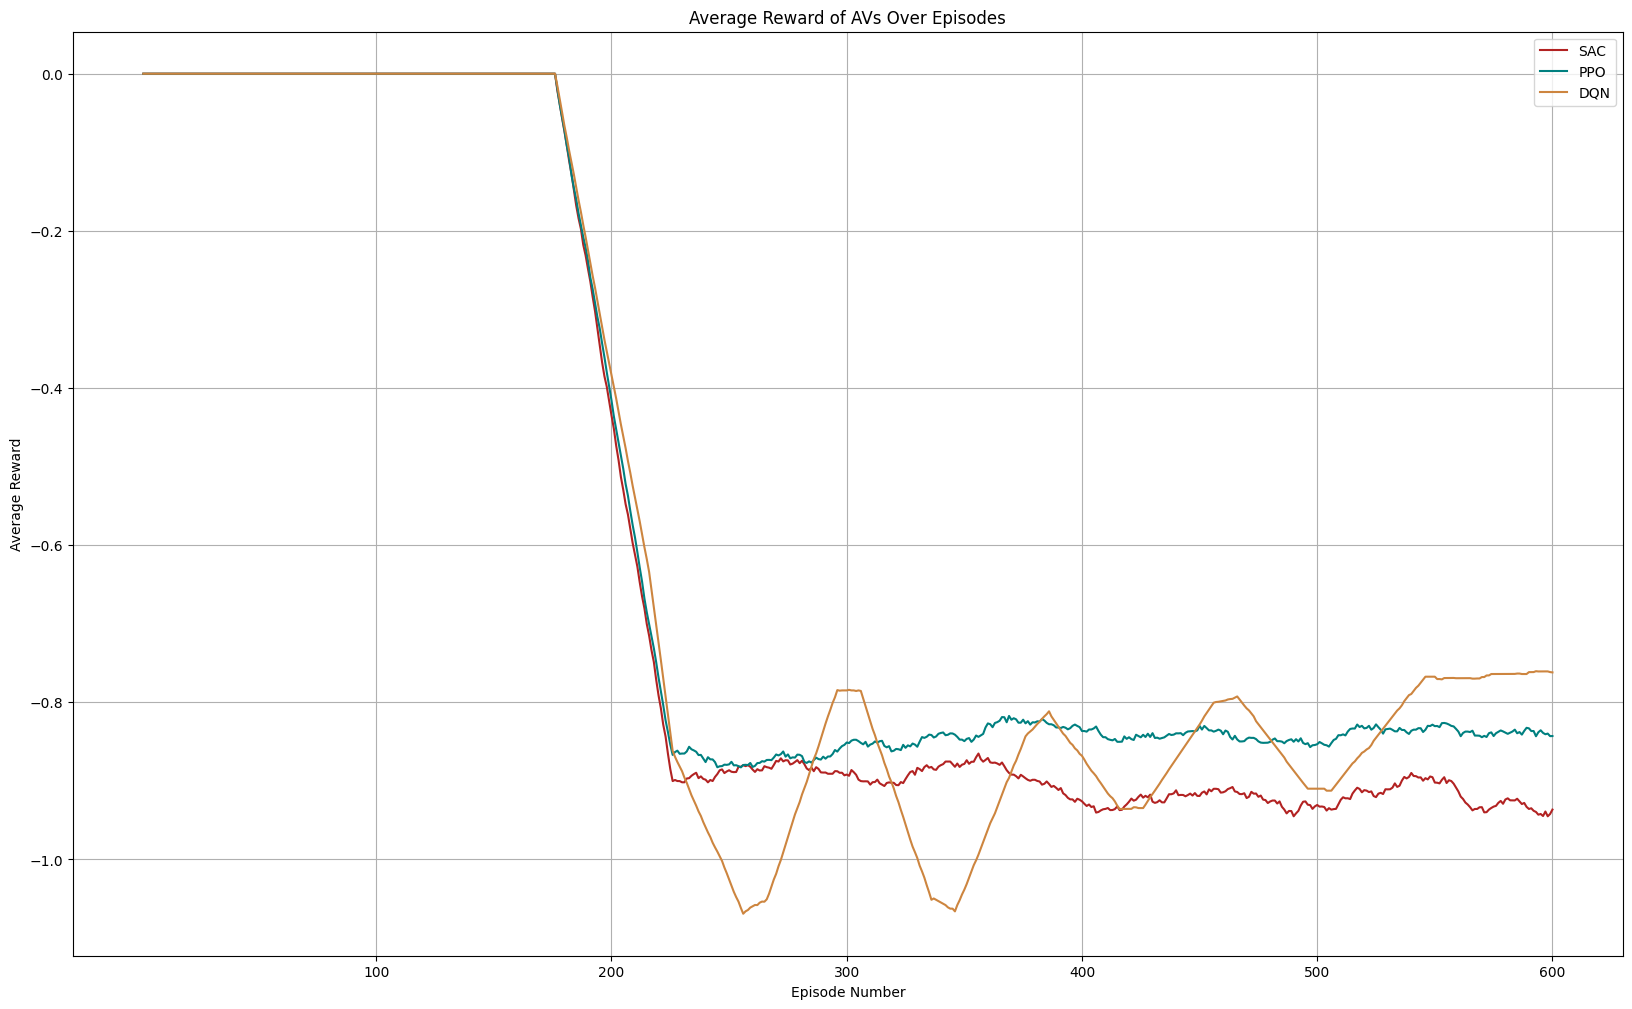

In [10]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define the list of folders containing the CSV files
folder_paths = ['training_records/sac/episodes', 'training_records/ppo/episodes', 'training_records/dqn/episodes']
legend = ['SAC', 'PPO', 'DQN']

# Define colors for each plot
colors = ["firebrick", "teal", "peru"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure
plt.figure(figsize=(20, 12))

# Iterate through all folder paths with corresponding colors
for folder_path, legend_name, color in zip(folder_paths, legend, colors):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and average travel times
    episodes = []
    avg_travel_times = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV rows
        av_df = df[df['kind'] == 'AV']

        # Calculate the average travel time for AV entries (reward in your case)
        avg_travel_time = av_df['reward'].mean()
        avg_travel_times.append(avg_travel_time)

    ## Transform NaN values to zero
    array_with_nans = np.array(avg_travel_times)
    array_without_nans = np.nan_to_num(array_with_nans, nan=0)

    # Convert back to list if needed
    avg_travel_times = array_without_nans.tolist()

    # Smooth the average travel times using uniform_filter1d
    avg_travel_times = uniform_filter1d(avg_travel_times, size=50)

    # Plot the results for the current folder on the same figure
    plt.plot(episodes, avg_travel_times, linestyle='-', color=color, label=legend_name)  # Apply color and label

# Customize the plot
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Average Reward of AVs Over Episodes')
plt.grid(True)

# Set x-ticks to show every 100 episodes
if episodes:
    plt.xticks([ep for ep in episodes if ep % 100 == 0])

# Show legend to differentiate between lines for each folder
plt.legend()

# Show the plot
plt.show()


> Plot the number of agents choosing actions 0 and 1.

Processing folder: training_records/sac/episodes
Processing folder: training_records/ppo/episodes
Processing folder: training_records/dqn/episodes


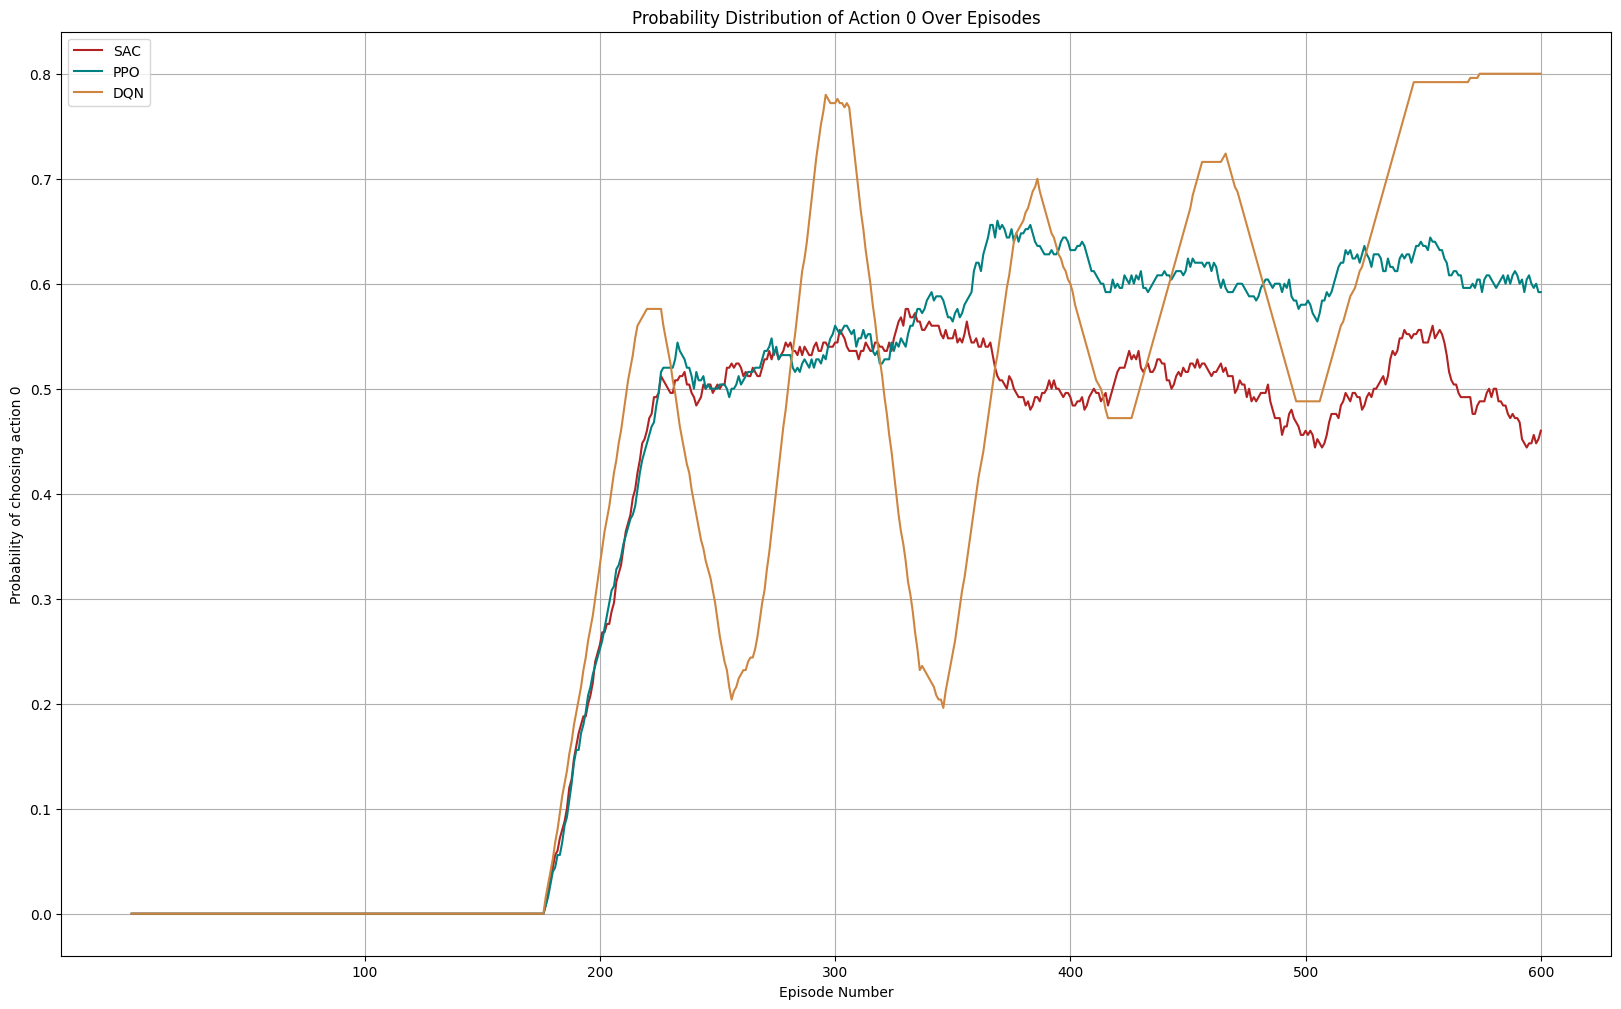

In [11]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define the list of folders containing the CSV files
folder_paths = ['training_records/sac/episodes', 'training_records/ppo/episodes', 'training_records/dqn/episodes']
legend = ['SAC', 'PPO', 'DQN']
colors = ["firebrick", "teal", "peru"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure
plt.figure(figsize=(20, 12))

# Iterate through all folder paths with corresponding colors
for folder_path, legend_name, color in zip(folder_paths, legend, colors):
    print(f"Processing folder: {folder_path}")

    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and action probabilities
    episodes = []
    prob_action_0 = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV rows
        av_df = df[df['kind'] == 'AV']

        # Calculate probabilities for action 0
        total_agents = len(av_df)
        if total_agents > 0:
            prob_action_0.append(np.sum(av_df['action'] == 0) / total_agents)
        else:
            prob_action_0.append(0)

    # Convert list to numpy array
    prob_action_0 = np.array(prob_action_0)

    # Smooth the probabilities using uniform_filter1d
    prob_action_0_smoothed = uniform_filter1d(prob_action_0, size=50)

    # Plot the smoothed probabilities for action 0
    plt.plot(episodes, prob_action_0_smoothed, linestyle='-', color=color, label=f'{legend_name}')  

# Customize the plot
plt.xlabel('Episode Number')
plt.ylabel('Probability of choosing action 0')
plt.title('Probability Distribution of Action 0 Over Episodes')
plt.grid(True)

# Set x-ticks to show every 100 episodes
if episodes:
    plt.xticks([ep for ep in episodes if ep % 100 == 0])

# Show legend to differentiate between lines for each folder
plt.legend()

# Show the plot
plt.show()


Processing folder: training_records/sac/episodes
Processing folder: training_records/ppo/episodes
Processing folder: training_records/dqn/episodes


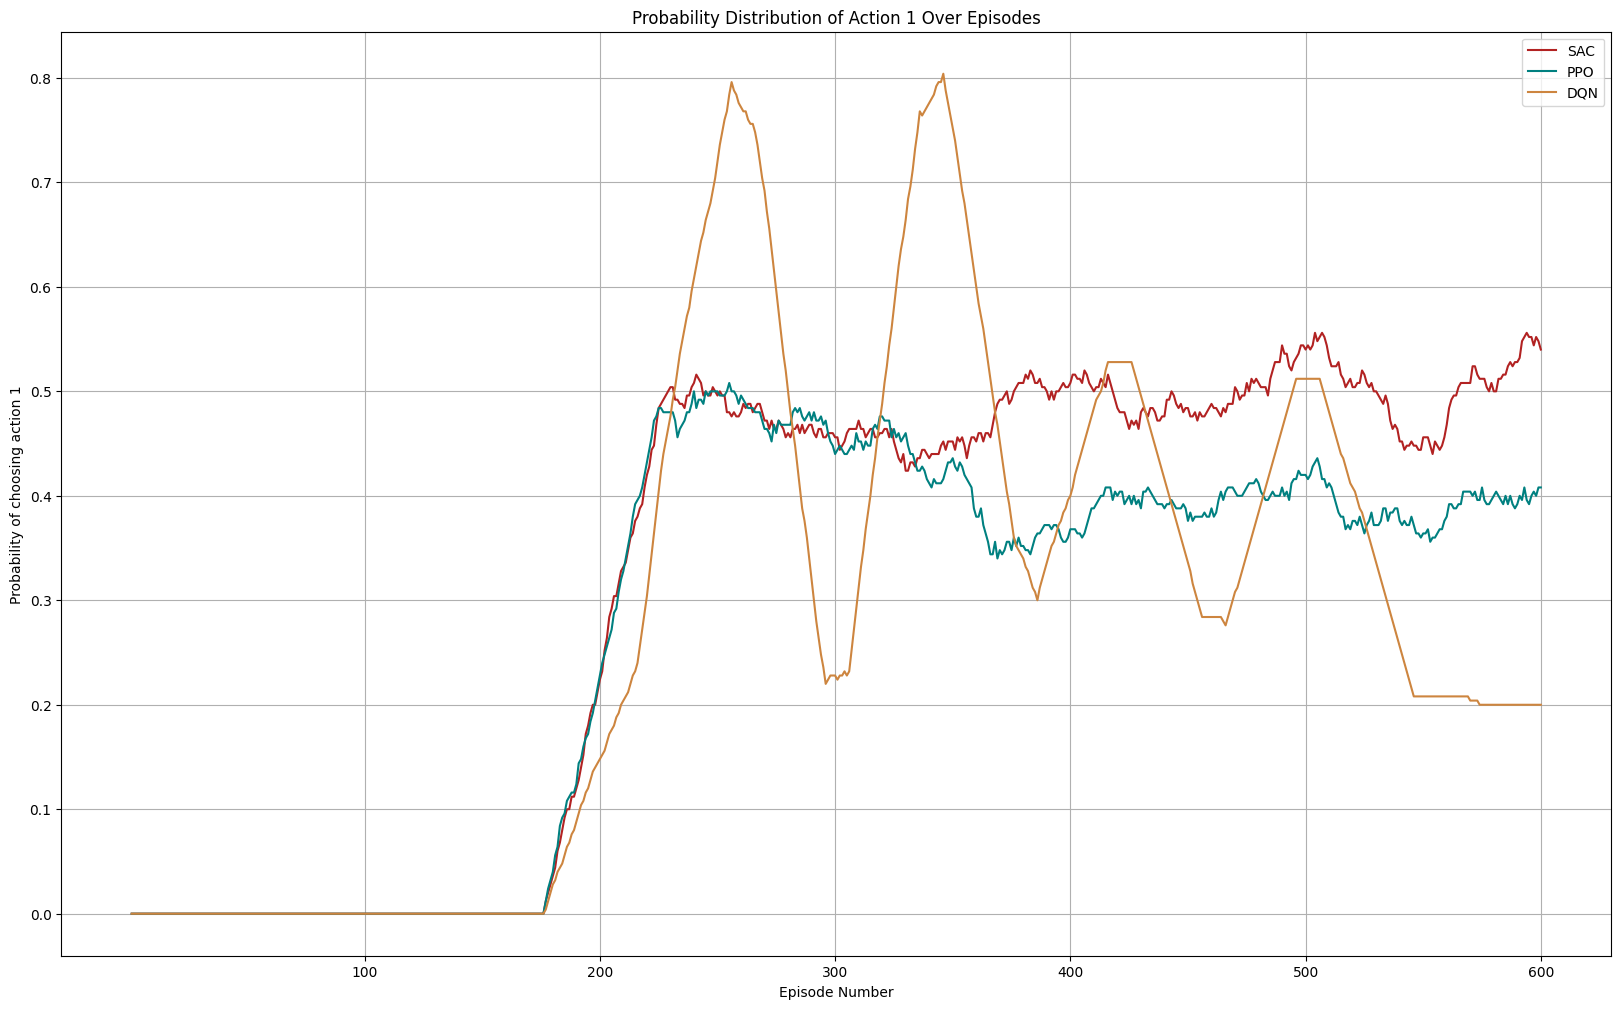

In [12]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define the list of folders containing the CSV files
folder_paths = ['training_records/sac/episodes', 'training_records/ppo/episodes', 'training_records/dqn/episodes']
legend = ['SAC', 'PPO', 'DQN']
colors = ["firebrick", "teal", "peru"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure
plt.figure(figsize=(20, 12))

# Iterate through all folder paths with corresponding colors
for folder_path, legend_name, color in zip(folder_paths, legend, colors):
    print(f"Processing folder: {folder_path}")

    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and action probabilities
    episodes = []
    prob_action_0 = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV rows
        av_df = df[df['kind'] == 'AV']

        # Calculate probabilities for action 0
        total_agents = len(av_df)
        if total_agents > 0:
            prob_action_0.append(np.sum(av_df['action'] == 1) / total_agents)
        else:
            prob_action_0.append(0)

    # Convert list to numpy array
    prob_action_0 = np.array(prob_action_0)

    # Smooth the probabilities using uniform_filter1d
    prob_action_0_smoothed = uniform_filter1d(prob_action_0, size=50)

    # Plot the smoothed probabilities for action 0
    plt.plot(episodes, prob_action_0_smoothed, linestyle='-', color=color, label=f'{legend_name}')  

# Customize the plot
plt.xlabel('Episode Number')
plt.ylabel('Probability of choosing action 1')
plt.title('Probability Distribution of Action 1 Over Episodes')
plt.grid(True)

# Set x-ticks to show every 100 episodes
if episodes:
    plt.xticks([ep for ep in episodes if ep % 100 == 0])

# Show legend to differentiate between lines for each folder
plt.legend()

# Show the plot
plt.show()


## PPO

### Observations

- As time progresses, the number of autonomous vehicle (AV) agents selecting action 0 increases. Prior to mutation, human agents evenly distribute their choices between two routes, with half choosing one route and the other half choosing the alternative.

### General plot

In [1]:
import os
from IPython.display import display, Markdown

# Path to the images directory
images_dir = 'plots/ppo'

# List all image files in the directory
images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

# Generate and display Markdown for each image
for image in images:
    markdown_image = f"![{image}]({images_dir}/{image})"
    display(Markdown(markdown_image))

![actions.png](plots/ppo/actions.png)

![actions_shifts.png](plots/ppo/actions_shifts.png)

![rewards.png](plots/ppo/rewards.png)

![simulation_length.png](plots/ppo/simulation_length.png)

![travel_times.png](plots/ppo/travel_times.png)

![tt_dist.png](plots/ppo/tt_dist.png)

### Critic loss

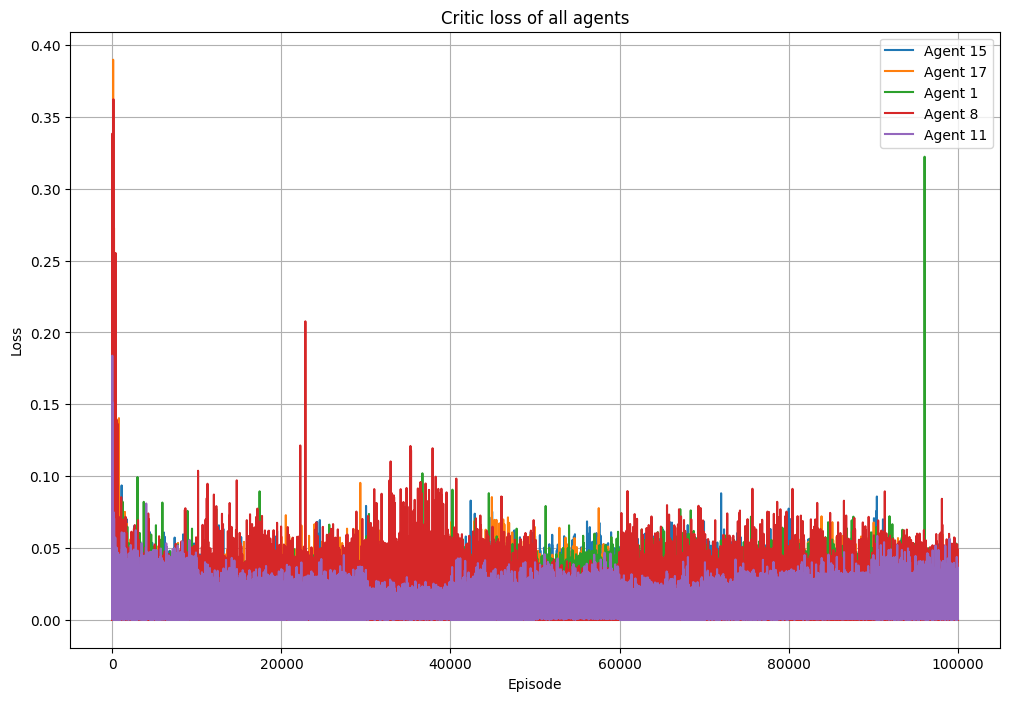

In [2]:
import json
import matplotlib.pyplot as plt

# Path to your JSON file
json_file = 'training_records/ppo/critic_loss.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Critic loss of all agents')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Entropy loss

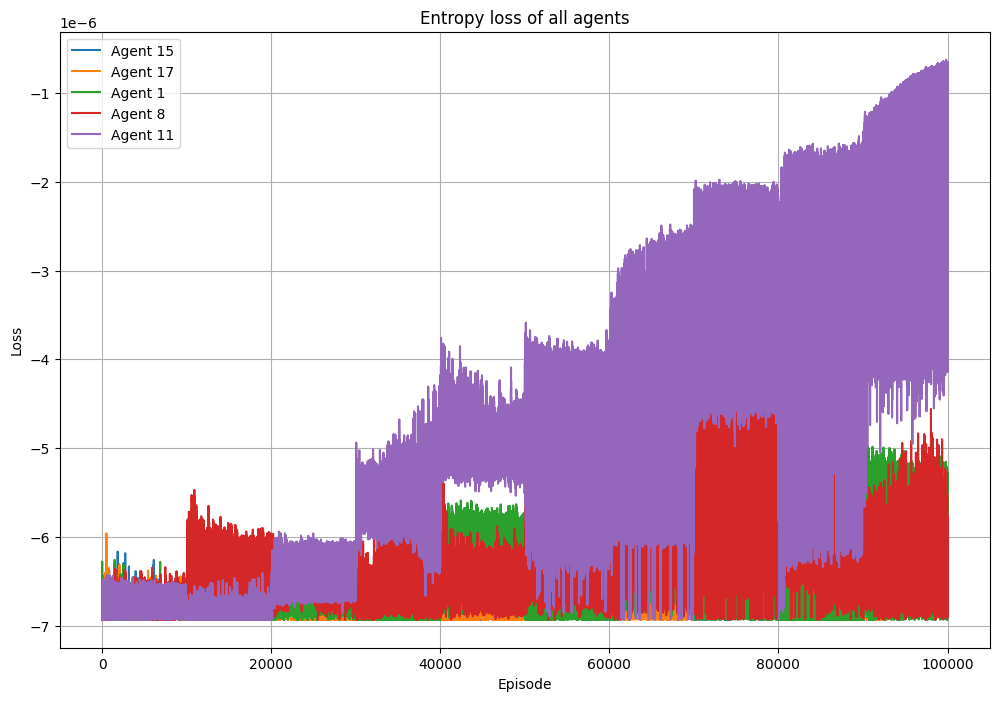

In [3]:
import json
import matplotlib.pyplot as plt

# Path to your JSON file
json_file = 'training_records/ppo/entropy_loss.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Entropy loss of all agents')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Loss

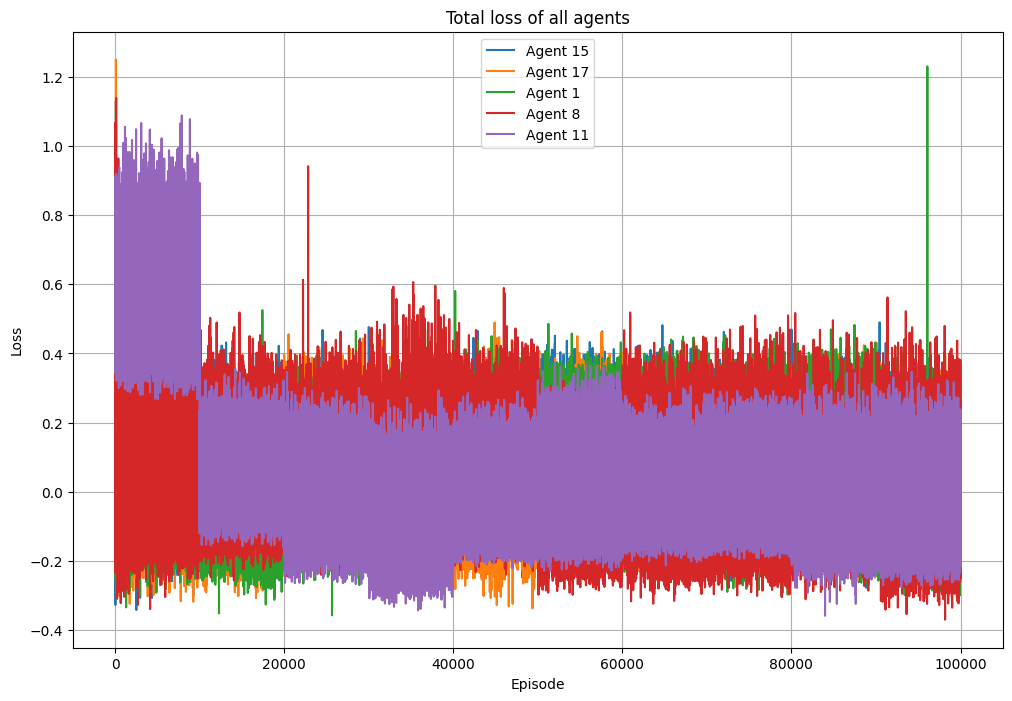

In [4]:
import json
import matplotlib.pyplot as plt

# Path to your JSON file
json_file = 'training_records/ppo/loss_file.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Total loss of all agents')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Objective loss

It's basically, the loss of the clipped surrogate objective.

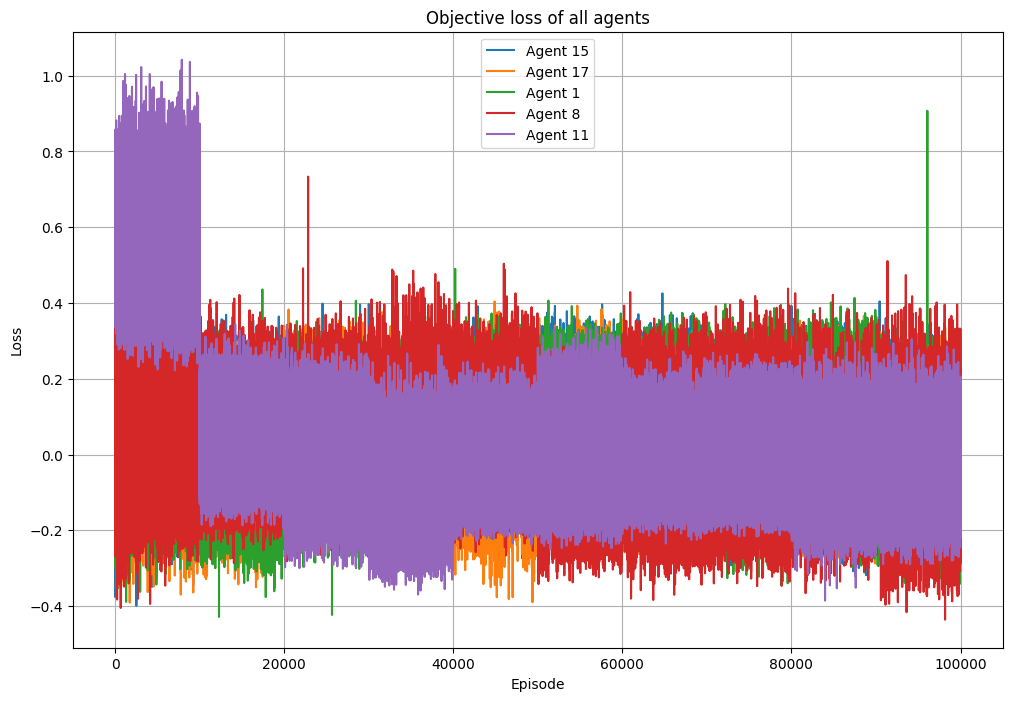

In [5]:
import json
import matplotlib.pyplot as plt

# Path to your JSON file
json_file = 'training_records/ppo/objective_loss.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Objective loss of all agents')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## SAC

In [13]:
import os
from IPython.display import display, Markdown

# Path to the images directory
images_dir = 'plots/sac'

# List all image files in the directory
images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

# Generate and display Markdown for each image
for image in images:
    markdown_image = f"![{image}]({images_dir}/{image})"
    display(Markdown(markdown_image))

![actions.png](plots/sac/actions.png)

![actions_shifts.png](plots/sac/actions_shifts.png)

![rewards.png](plots/sac/rewards.png)

![simulation_length.png](plots/sac/simulation_length.png)

![travel_times.png](plots/sac/travel_times.png)

![tt_dist.png](plots/sac/tt_dist.png)

### Actor loss

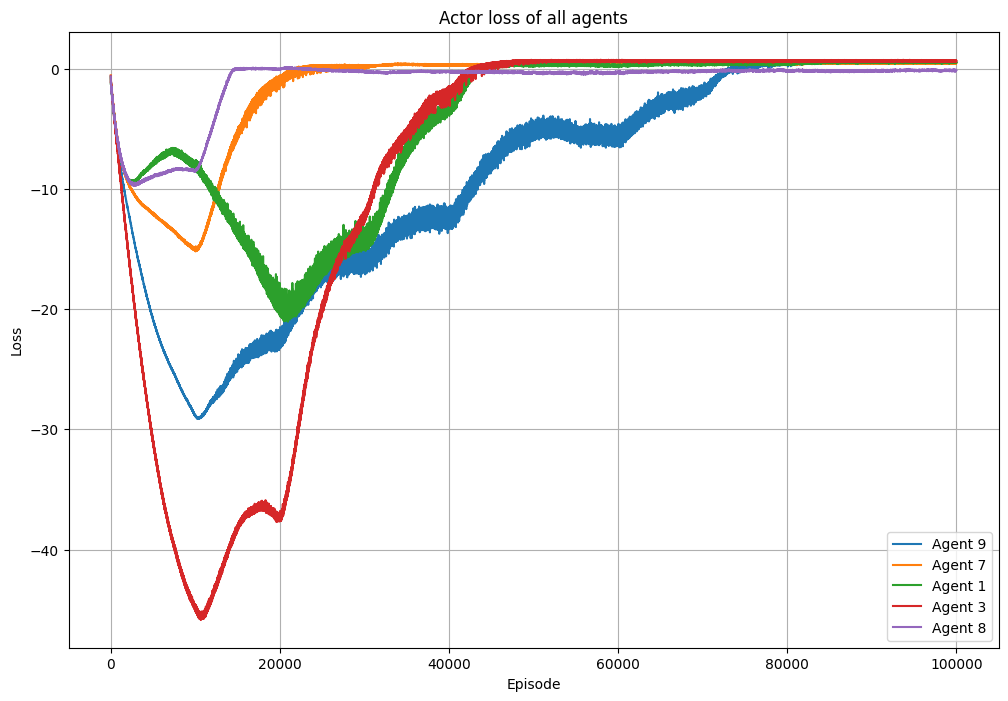

In [32]:
# Path to your JSON file
json_file = 'training_records/sac/actor_loss.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Actor loss of all agents')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Alpha loss

The alpha loss refers to the loss used to optimize the temperature parameter α. This temperature parameter controls the trade-off between exploration (entropy maximization) and exploitation (reward maximization) in the policy.

The purpose of Alpha:
- A higher 𝛼 value puts more emphasis on exploration by prioritizing the entropy term (leading to more randomness in the actions).
- A lower 𝛼 value emphasizes exploitation, leading the policy to focus more on maximizing rewards rather than keeping actions diverse.

```python 
alpha_loss = -alpha * (log_pi + target_entropy)

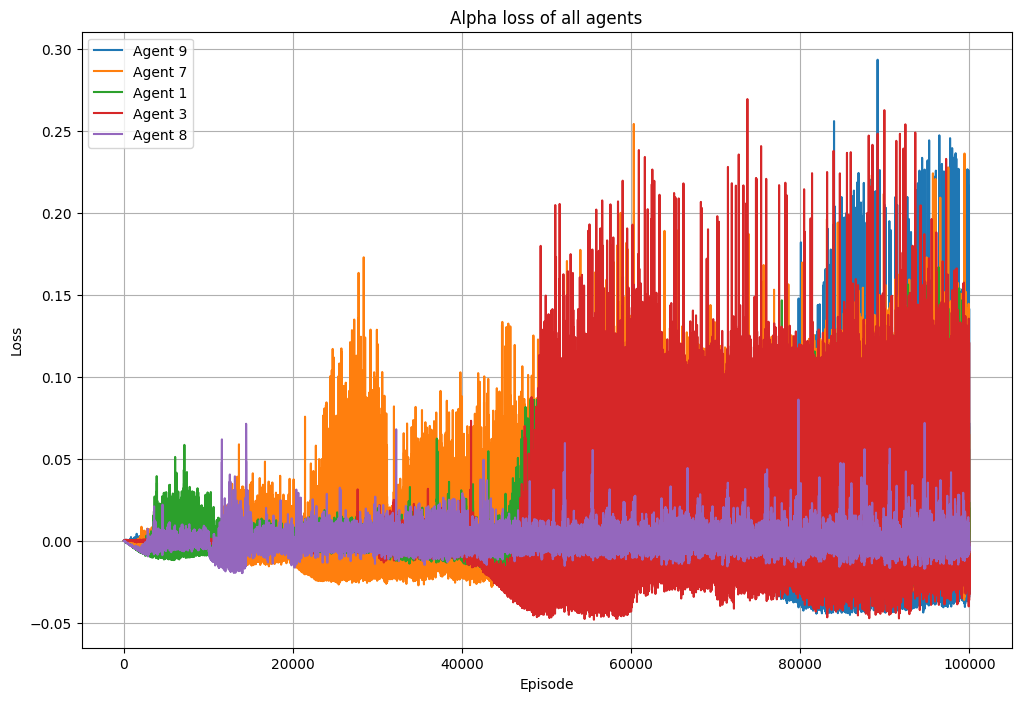

In [31]:
# Path to your JSON file
json_file = 'training_records/sac/alpha_loss.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Alpha loss of all agents')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Total loss

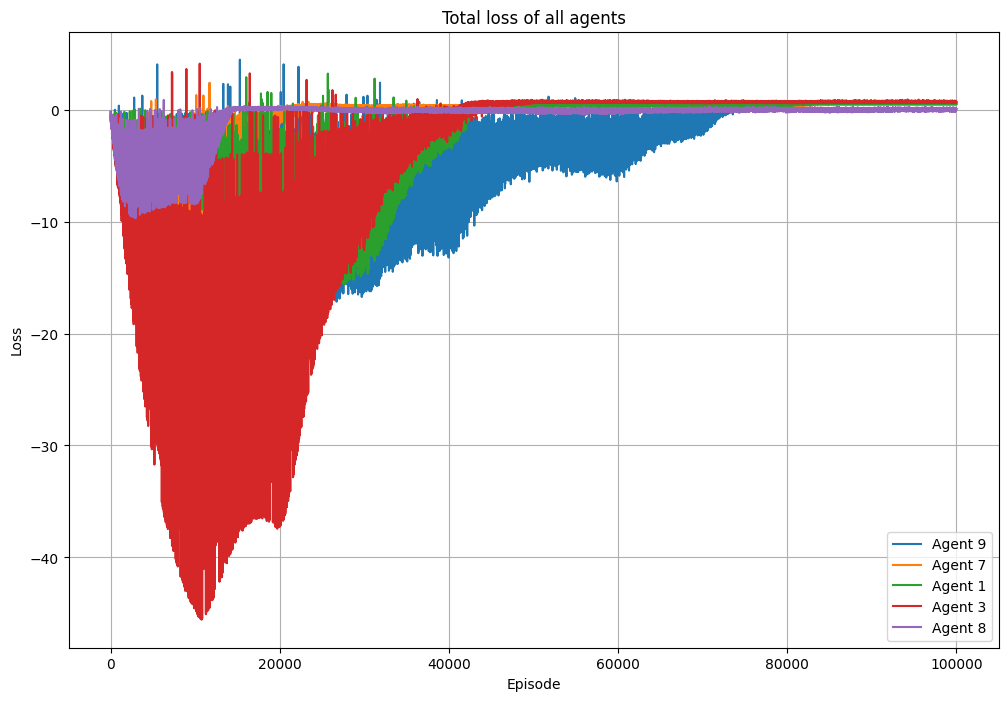

In [30]:
# Path to your JSON file
json_file = 'training_records/sac/loss_file.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Total loss of all agents')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Q value loss

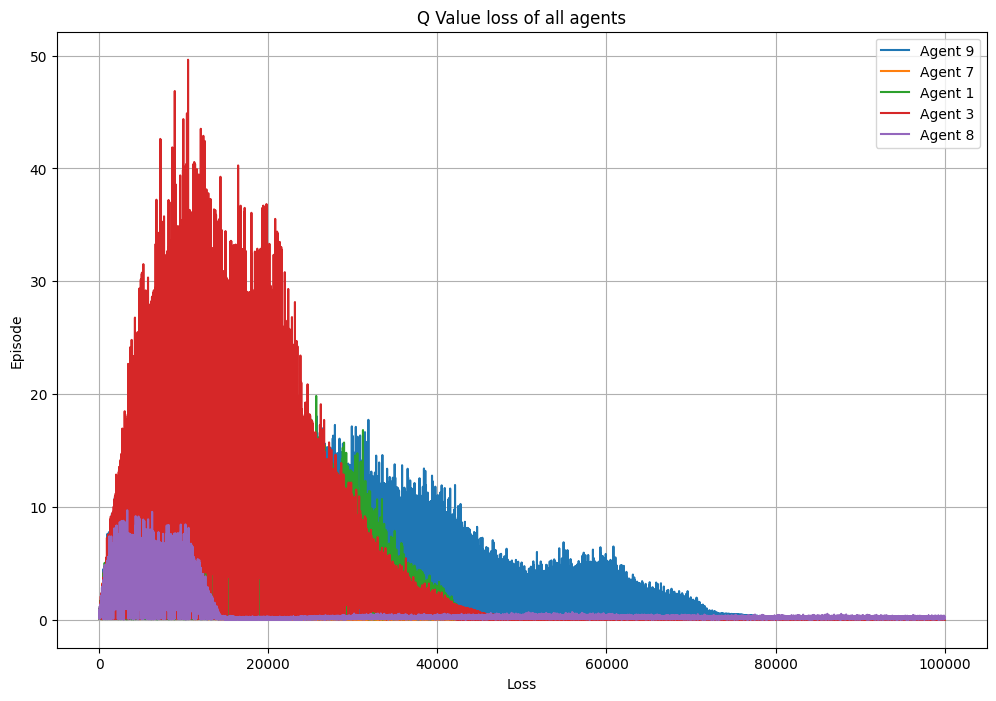

In [29]:
# Path to your JSON file
json_file = 'training_records/sac/qvalue_loss.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Q Value loss of all agents')
plt.xlabel('Loss')
plt.ylabel('Episode')
plt.legend()
plt.grid(True)
plt.show()

## DQN

In [7]:
import os
from IPython.display import display, Markdown

# Path to the images directory
images_dir = 'plots/dqn'

# List all image files in the directory
images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

# Generate and display Markdown for each image
for image in images:
    markdown_image = f"![{image}]({images_dir}/{image})"
    display(Markdown(markdown_image))

![actions.png](plots/dqn/actions.png)

![actions_shifts.png](plots/dqn/actions_shifts.png)

![rewards.png](plots/dqn/rewards.png)

![simulation_length.png](plots/dqn/simulation_length.png)

![travel_times.png](plots/dqn/travel_times.png)

![tt_dist.png](plots/dqn/tt_dist.png)

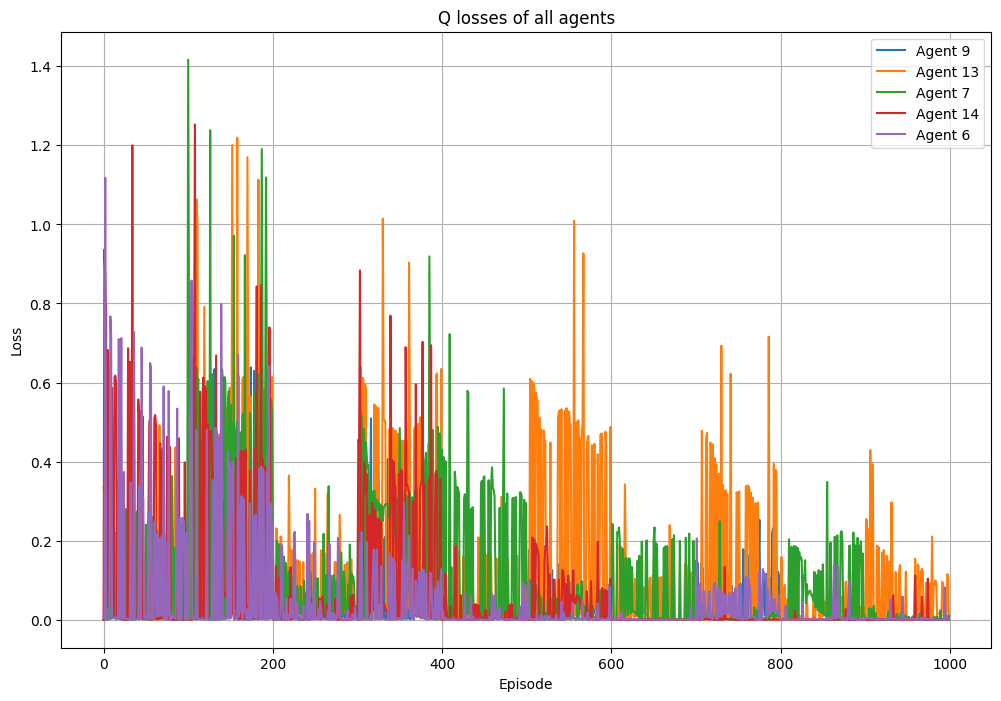

In [8]:
# Path to your JSON file
json_file = 'training_records/dqn/q_losses_loop.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Q losses of all agents')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

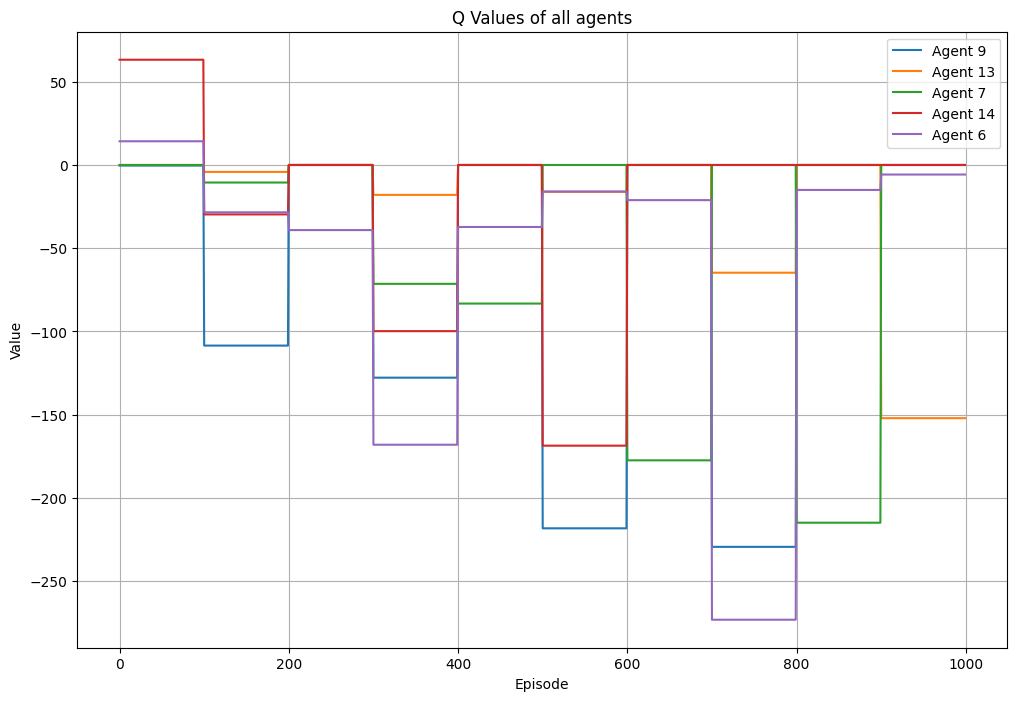

In [9]:
# Path to your JSON file
json_file = 'training_records/dqn/q_values_loop.json'

# Read the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Create a single plot for all agents
plt.figure(figsize=(12, 8))

# Iterate through each agent id and their data
for agent_id, values in data.items():
    plt.plot(values, linestyle='-', label=f'Agent {agent_id}')

# Add labels and title
plt.title('Q Values of all agents')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

It has this format, because we update the policy every 10 episodes.

The q values are calculated like this:
```python
q_values[group].append((data[group, "action_value"] * data[group, "action"]).sum().item()/ frames_per_batch)
```

As the action value converges to zero, the q_values also converge to zero.